In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Details.csv")

# Data Cleaning & Preprocessing

print("Initial Shape:", df.shape)

# Remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# Handle null values
print("\nMissing Values:\n", df.isnull().sum())
df = df.fillna(0)   # You can also use df.dropna()

# Feature Engineering
if "Profit" in df.columns and "Amount" in df.columns:
    df["Profit Margin"] = (df["Profit"] / df["Amount"]).round(2)

if "Amount" in df.columns and "Quantity" in df.columns:
    df["Total Sales"] = df["Amount"] * df["Quantity"]

print("\nNew Columns Added: Profit Margin, Total Sales (if available)")
print("Final Shape:", df.shape)
print(df.head())

Initial Shape: (1500, 7)
After removing duplicates: (1500, 7)

Missing Values:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

New Columns Added: Profit Margin, Total Sales (if available)
Final Shape: (1500, 9)
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  Profit Margin  Total Sales  
0          COD           0.60         7672  
1          EMI           0.01        80206  
2          EMI           0.05        23416  
3  Credit Card           0.25        22776  
4  Credit Card           0.44        10468  


Summary Statistics:
             Amount      Profit     Quantity  Profit Margin   Total Sales
count  1500.000000  1500.00000  1500.000000    1500.000000   1500.000000
mean    291.847333    24.64200     3.743333       0.019253   1448.001333
std     461.924620   168.55881     2.184942       0.392119   3722.037469
min       4.000000 -1981.00000     1.000000      -2.430000      4.000000
25%      47.750000   -12.00000     2.000000      -0.150000    128.750000
50%     122.000000     8.00000     3.000000       0.090000    421.000000
75%     326.250000    38.00000     5.000000       0.290000   1287.000000
max    5729.000000  1864.00000    14.000000       2.250000  80206.000000


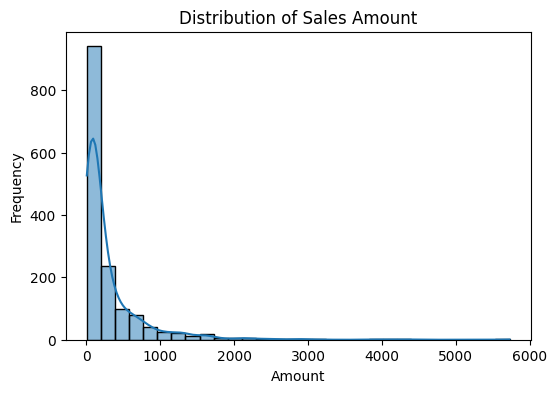

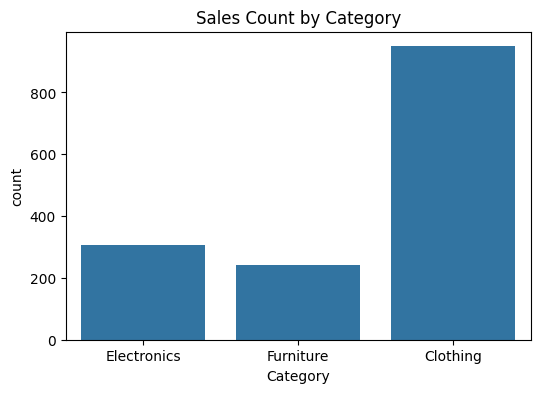

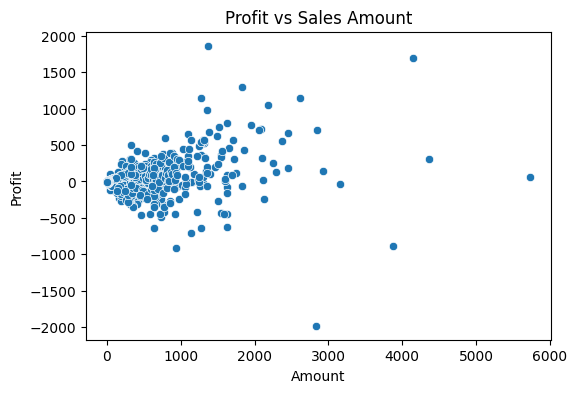

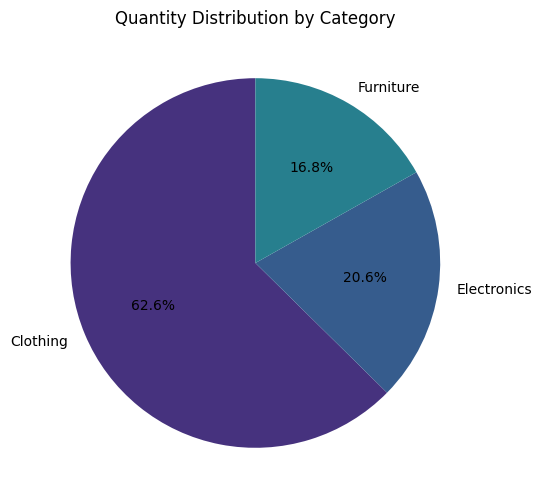

In [10]:
# Exploratory Data Analysis (EDA)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Amount
if "Amount" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Amount"], bins=30, kde=True)
    plt.title("Distribution of Sales Amount")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.show()

# Sales by Category (if column exists)
if "Category" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Category", data=df)
    plt.title("Sales Count by Category")
    plt.show()

# Sales Trend over Time (if Date column exists)
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    sales_trend = df.groupby("Date")["Amount"].sum()
    plt.figure(figsize=(8,4))
    sales_trend.plot()
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales Amount")
    plt.show()

# Profit vs Sales scatter
if "Amount" in df.columns and "Profit" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Amount", y="Profit", data=df)
    plt.title("Profit vs Sales Amount")
    plt.show()

# Pie chart of Quantity by Category
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(category_quantity['Quantity'], labels=category_quantity['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Quantity Distribution by Category")
plt.show()